<a href="https://colab.research.google.com/github/Megalonnix/ChallengeTelecomX/blob/master/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 📌 **(ETL fase 01) - Extração Dados:**

In [500]:
import pandas as pd

try:
  url = r'data\dadosAPI\TelecomX_Data.json'
  df = pd.read_json(url)
except Exception as e:
  print(f'Erro ao ler primeira url: {e}')
  url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
  df = pd.read_json(url)

Erro ao ler primeira url: File data\dadosAPI\TelecomX_Data.json does not exist


In [501]:
df.head(3)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


### 🔧 **(ETL fase 02) - Análise do Dataframe original + normalização:**

O dataframe provém de um <strong>arquivo.json</strong>, por isso a seguir, farei uso do método normalize de maneira
a deixar o documento mais adequado para manipulação.

In [502]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [503]:
df.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [504]:
colunas_df = list(df.columns)
colunas_df

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

In [505]:
pd.json_normalize(df['customer']).head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9


In [506]:
pd.json_normalize(df['phone']).head(2)

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes


In [507]:
pd.json_normalize(df['internet']).head(2)

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes


In [508]:
pd.json_normalize(df['account']).head(2)

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4


In [509]:
# Juntando subdataframes ao df original:
# exclui todas as colunas com objetos literais JS, e
# concatenei os dfs normalizados acima:

df = pd.concat([
    df.drop(columns=['customer','phone','internet','account']),
    pd.json_normalize(df['customer'], sep='_'),
    pd.json_normalize(df['phone'], sep='_'),
    pd.json_normalize(df['internet'], sep='_'),
    pd.json_normalize(df['account'], sep='_')
    ],
    axis=1)

In [510]:
df.head(3)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85


In [511]:
df.set_index('customerID', inplace=True)

In [512]:
df.head(3)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
customerID,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85


In [513]:
# Analizando novas colunas existentes:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   object 
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   object 
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null 

In [514]:
df.dtypes

,0
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [515]:
colunas_df = list(df.columns)
colunas_df

['Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges_Monthly',
 'Charges_Total']

### 🔧 **(ETL fase 03) - Verificando Inconsistências nos Dados:**

In [516]:
def getValoresCelulas(df, nmColOrigem):
    vlsExistentes = {
        'nm_coluna': nmColOrigem,
        'valores_vistos': \
        list(pd.unique(df[nmColOrigem]))
    }
    return vlsExistentes

In [517]:
getValoresCelulas(df, 'Churn') # Valores preenchidos na coluna "Evasão/Churn".

{'nm_coluna': 'Churn', 'valores_vistos': ['No', 'Yes', '']}

In [518]:
for nmColuna in df.columns:
    print(getValoresCelulas(df, nmColuna))

{'nm_coluna': 'Churn', 'valores_vistos': ['No', 'Yes', '']}
{'nm_coluna': 'gender', 'valores_vistos': ['Female', 'Male']}
{'nm_coluna': 'SeniorCitizen', 'valores_vistos': [np.int64(0), np.int64(1)]}
{'nm_coluna': 'Partner', 'valores_vistos': ['Yes', 'No']}
{'nm_coluna': 'Dependents', 'valores_vistos': ['Yes', 'No']}
{'nm_coluna': 'tenure', 'valores_vistos': [np.int64(9), np.int64(4), np.int64(13), np.int64(3), np.int64(71), np.int64(63), np.int64(7), np.int64(65), np.int64(54), np.int64(72), np.int64(5), np.int64(56), np.int64(34), np.int64(1), np.int64(45), np.int64(50), np.int64(23), np.int64(55), np.int64(26), np.int64(69), np.int64(11), np.int64(37), np.int64(49), np.int64(66), np.int64(67), np.int64(20), np.int64(43), np.int64(59), np.int64(12), np.int64(27), np.int64(2), np.int64(25), np.int64(29), np.int64(14), np.int64(35), np.int64(64), np.int64(39), np.int64(40), np.int64(6), np.int64(30), np.int64(70), np.int64(57), np.int64(58), np.int64(16), np.int64(32), np.int64(33), np.

In [519]:
df['Charges_Monthly'].isna()

,Charges_Monthly
customerID,
0002-ORFBO,False
0003-MKNFE,False
0004-TLHLJ,False
0011-IGKFF,False
0013-EXCHZ,False
...,...
9987-LUTYD,False
9992-RRAMN,False
9992-UJOEL,False


In [520]:
df.columns.str.lower()

Index(['churn', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'charges_monthly', 'charges_total'],
      dtype='object')

In [521]:
df.columns.str.lower().str.replace(' ','_')

Index(['churn', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'charges_monthly', 'charges_total'],
      dtype='object')

In [522]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [523]:
df.head(3)

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total
customerID,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85


In [524]:
df.churn.unique()

array(['No', 'Yes', ''], dtype=object)

In [525]:
df['churn'].unique()

array(['No', 'Yes', ''], dtype=object)

### 🔧 **(ETL fase 04) - Tratando as Inconsistências nos Dados:**

Primeiro antes de criar a coluna "Contas Diárias" pedida no Challenge, excluirei alguns valores inválidos dentro do dataframe.
- Antes de converter valores aos tipos *np.float64*, *string*, *etc*; irei verificar valores inadequados, como strings vazias ou NaN.
- Feito isso, faço a conversão dos tipos.

In [526]:
# Testes iniciais:

a = df['churn'].isin(['Yes']).sum()
b = df['churn'].isin(['No']).sum()
(a + b) == len(df['churn'])

np.False_

In [527]:
a + b

np.int64(7043)

In [528]:
selecao_churn1 = df['churn'] == 'Yes'
selecao_churn2 = df['churn'] == 'No'
len(df[selecao_churn1]) + \
len(df[selecao_churn2])

7043

In [529]:
c = df['churn'].isin(['Yes','No']).sum()
c

np.int64(7043)

In [530]:
c < len(df)

np.True_

In [531]:
df['churn'].value_counts(dropna=False)

,count
churn,
No,5174
Yes,1869
,224


In [532]:
# Série booleana com indices do DF que estão adequados
# ao padrão "Yes"/"No":
df['churn'].isin(['Yes','No'])

,churn
customerID,
0002-ORFBO,True
0003-MKNFE,True
0004-TLHLJ,True
0011-IGKFF,True
0013-EXCHZ,True
...,...
9987-LUTYD,True
9992-RRAMN,True
9992-UJOEL,True


In [533]:
# Indices os quais RESPEITAM o padrão acima:
df[df['churn'].isin(['Yes','No'])].head(3)

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total
customerID,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85


In [534]:
# Indices os quais NÃO respeitam:
df[~df['churn'].isin(['Yes','No'])].head(3)

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total
customerID,,,,,,,,,,,,,,,,,,,,
0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
0120-YZLQA,,Male,0,No,No,71,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2


In [535]:
len(df[~df['churn'].isin(['Yes','No'])]) # Número deles

224

In [536]:
df = df[df['churn'].isin(['Yes','No'])] # Retirando todos os índices indesejados do Dataframe

In [537]:
df['churn'].value_counts()

,count
churn,
No,5174
Yes,1869


In [538]:
df['churn'] = df['churn'].astype(str)

/tmp/ipython-input-2992548598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['churn'] = df['churn'].astype(str)


In [539]:
df = df[~df['charges_total'].isin(['',' '])] # Removendo valores vazios dos registros de cobrança.

In [540]:
import numpy as np

copia_coluna = df['charges_total'].astype(np.float64)
df.drop(columns='charges_total')
df['charges_total'] = copia_coluna

In [541]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   churn             7032 non-null   object 
 1   gender            7032 non-null   object 
 2   seniorcitizen     7032 non-null   int64  
 3   partner           7032 non-null   object 
 4   dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   phoneservice      7032 non-null   object 
 7   multiplelines     7032 non-null   object 
 8   internetservice   7032 non-null   object 
 9   onlinesecurity    7032 non-null   object 
 10  onlinebackup      7032 non-null   object 
 11  deviceprotection  7032 non-null   object 
 12  techsupport       7032 non-null   object 
 13  streamingtv       7032 non-null   object 
 14  streamingmovies   7032 non-null   object 
 15  contract          7032 non-null   object 
 16  paperlessbilling  7032 non-null 

In [542]:
df.charges_total.head(3)

,charges_total
customerID,
0002-ORFBO,593.30
0003-MKNFE,542.40
0004-TLHLJ,280.85


In [543]:
df['charges_total'].head(3)

,charges_total
customerID,
0002-ORFBO,593.30
0003-MKNFE,542.40
0004-TLHLJ,280.85


In [544]:
df.charges_total.sum()

np.float64(16056168.7)

In [545]:
df.charges_monthly.sum()

np.float64(455661.0)

In [546]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   churn             7032 non-null   object 
 1   gender            7032 non-null   object 
 2   seniorcitizen     7032 non-null   int64  
 3   partner           7032 non-null   object 
 4   dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   phoneservice      7032 non-null   object 
 7   multiplelines     7032 non-null   object 
 8   internetservice   7032 non-null   object 
 9   onlinesecurity    7032 non-null   object 
 10  onlinebackup      7032 non-null   object 
 11  deviceprotection  7032 non-null   object 
 12  techsupport       7032 non-null   object 
 13  streamingtv       7032 non-null   object 
 14  streamingmovies   7032 non-null   object 
 15  contract          7032 non-null   object 
 16  paperlessbilling  7032 non-null 

In [547]:
contas_diarias_calc = (df['charges_monthly']/30)
contas_diarias_calc

,charges_monthly
customerID,
0002-ORFBO,2.186667
0003-MKNFE,1.996667
0004-TLHLJ,2.463333
0011-IGKFF,3.266667
0013-EXCHZ,2.796667
...,...
9987-LUTYD,1.838333
9992-RRAMN,2.836667
9992-UJOEL,1.676667


In [548]:
df['contas_diarias'] = contas_diarias_calc
df.loc[:,'contas_diarias'] = df['contas_diarias'].astype(np.float64)

In [549]:
df.columns

Index(['churn', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'charges_monthly', 'charges_total', 'contas_diarias'],
      dtype='object')

In [550]:
df.head(1)

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total,contas_diarias
customerID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.186667


### 🔧 **(ETL fase 04B) - Padronização e Transformação de Dados (Opcional):**

In [551]:
for nmColuna in df.columns:
    print(getValoresCelulas(df, nmColuna))

{'nm_coluna': 'churn', 'valores_vistos': ['No', 'Yes']}
{'nm_coluna': 'gender', 'valores_vistos': ['Female', 'Male']}
{'nm_coluna': 'seniorcitizen', 'valores_vistos': [np.int64(0), np.int64(1)]}
{'nm_coluna': 'partner', 'valores_vistos': ['Yes', 'No']}
{'nm_coluna': 'dependents', 'valores_vistos': ['Yes', 'No']}
{'nm_coluna': 'tenure', 'valores_vistos': [np.int64(9), np.int64(4), np.int64(13), np.int64(3), np.int64(71), np.int64(63), np.int64(7), np.int64(65), np.int64(54), np.int64(72), np.int64(5), np.int64(56), np.int64(34), np.int64(1), np.int64(45), np.int64(50), np.int64(23), np.int64(55), np.int64(26), np.int64(69), np.int64(37), np.int64(49), np.int64(66), np.int64(67), np.int64(20), np.int64(43), np.int64(59), np.int64(12), np.int64(27), np.int64(2), np.int64(25), np.int64(29), np.int64(14), np.int64(35), np.int64(64), np.int64(39), np.int64(40), np.int64(11), np.int64(6), np.int64(30), np.int64(70), np.int64(57), np.int64(58), np.int64(16), np.int64(32), np.int64(33), np.int6

In [552]:
df_info_binarias = df.copy(deep=True)

In [553]:
# ----------------------------------------------------------------------
# AVISO: Não vou refatorar com funções para decorar melhor o comando:
# ----------------------------------------------------------------------

copia1 = df['churn'].map({'Yes': 1,'No': 0}).astype(np.int64)
df_info_binarias.drop(columns='churn')
df_info_binarias['churn'] = copia1

copia2 = df['partner'].map({'Yes': 1,'No': 0}).astype(np.int64)
df_info_binarias.drop(columns='partner')
df_info_binarias['partner'] = copia2

copia3 = df['dependents'].map({'Yes': 1,'No': 0}).astype(np.int64)
df_info_binarias.drop(columns='dependents')
df_info_binarias['dependents'] = copia3

# ----------------------------------------------------------------------
# AVISO 02: Essa segunda leva vou refatorar:
# ----------------------------------------------------------------------

def remodelarColuna(nmColuna, dicionario):
    copia = df[nmColuna].map(dicionario).astype(np.int64)
    df_info_binarias.drop(columns=nmColuna)
    df_info_binarias[nmColuna] = copia

dict_opcoes = {
    'Yes': 1,
    'DSL': 1,
    'Fiber optic': 1,
    'No': 0,
    'No phone service': 0,
    'No internet service': 0
}

remodelarColuna('phoneservice', dict_opcoes)
remodelarColuna('multiplelines', dict_opcoes)
remodelarColuna('internetservice', dict_opcoes)
remodelarColuna('onlinesecurity', dict_opcoes)
remodelarColuna('onlinebackup', dict_opcoes)
remodelarColuna('deviceprotection', dict_opcoes)
remodelarColuna('techsupport', dict_opcoes)
remodelarColuna('streamingtv', dict_opcoes)
remodelarColuna('streamingmovies', dict_opcoes)
remodelarColuna('paperlessbilling', dict_opcoes)

In [554]:
df_info_binarias.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   churn             7032 non-null   int64  
 1   gender            7032 non-null   object 
 2   seniorcitizen     7032 non-null   int64  
 3   partner           7032 non-null   int64  
 4   dependents        7032 non-null   int64  
 5   tenure            7032 non-null   int64  
 6   phoneservice      7032 non-null   int64  
 7   multiplelines     7032 non-null   int64  
 8   internetservice   7032 non-null   int64  
 9   onlinesecurity    7032 non-null   int64  
 10  onlinebackup      7032 non-null   int64  
 11  deviceprotection  7032 non-null   int64  
 12  techsupport       7032 non-null   int64  
 13  streamingtv       7032 non-null   int64  
 14  streamingmovies   7032 non-null   int64  
 15  contract          7032 non-null   object 
 16  paperlessbilling  7032 non-null 

In [555]:
df_info_binarias.head(3)

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total,contas_diarias
customerID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,Female,0,1,1,9,1,0,1,0,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
0003-MKNFE,0,Male,0,0,0,9,1,1,1,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
0004-TLHLJ,1,Male,0,0,0,4,1,0,1,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333


### **📊 (ETL fase 05) - Carga e Análise (L - Load & Analysis)**

In [556]:
df.describe()

,seniorcitizen,tenure,charges_monthly,charges_total,contas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,2.159940
std,0.368844,24.545260,30.085974,2266.771362,1.002866
min,0.000000,1.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.587500,401.450000,1.186250
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.862500,3794.737500,2.995417
max,1.000000,72.000000,118.750000,8684.800000,3.958333


In [557]:
df_info_binarias.describe()

,churn,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,charges_monthly,charges_total,contas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.783845,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.592719,64.798208,2283.300441,2.159940
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.411650,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.491363,30.085974,2266.771362,1.002866
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,1.186250
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,3794.737500,2.995417
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [558]:
df[['charges_monthly','charges_total','contas_diarias']].describe()

,charges_monthly,charges_total,contas_diarias
count,7032.000000,7032.000000,7032.000000
mean,64.798208,2283.300441,2.159940
std,30.085974,2266.771362,1.002866
min,18.250000,18.800000,0.608333
25%,35.587500,401.450000,1.186250
50%,70.350000,1397.475000,2.345000
75%,89.862500,3794.737500,2.995417
max,118.750000,8684.800000,3.958333


In [559]:
df_info_binarias[['charges_monthly','charges_total','contas_diarias']].describe()

,charges_monthly,charges_total,contas_diarias
count,7032.000000,7032.000000,7032.000000
mean,64.798208,2283.300441,2.159940
std,30.085974,2266.771362,1.002866
min,18.250000,18.800000,0.608333
25%,35.587500,401.450000,1.186250
50%,70.350000,1397.475000,2.345000
75%,89.862500,3794.737500,2.995417
max,118.750000,8684.800000,3.958333


In [560]:
df.columns

Index(['churn', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'charges_monthly', 'charges_total', 'contas_diarias'],
      dtype='object')

In [561]:
# df[['']] # ... pergar o desvio padrão de month to manth, two years, one year

In [562]:
df.query('contract=="Month-to-month"').head(1)

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total,contas_diarias
customerID,,,,,,,,,,,,,,,,,,,,,
0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.996667


In [563]:
contratos_pagamento_mensal =\
    df.query('contract=="Month-to-month"')['charges_monthly'].describe()
pd.DataFrame(contratos_pagamento_mensal)

,charges_monthly
count,3875.000000
mean,66.398490
std,26.926599
min,18.750000
25%,45.850000
50%,73.250000
75%,88.875000
max,117.450000


In [564]:
mediana = contratos_pagamento_mensal.median(numeric_only=True)
round(mediana,3)

69.824

In [565]:
contratos_pagamento_bienal =\
df.query('contract=="Two year"')['charges_monthly'].describe()
contratos_pagamento_bienal

,charges_monthly
count,1685.000000
mean,60.872374
std,34.712210
min,18.400000
25%,24.050000
50%,64.450000
75%,90.550000
max,118.750000


In [566]:
mediana = contratos_pagamento_bienal.median(numeric_only=True)
round(mediana,3)

62.661

In [567]:
contratos_pagamento_anual = \
df.query('contract=="One year"')['charges_monthly'].describe()
contratos_pagamento_anual

,charges_monthly
count,1472.000000
mean,65.079416
std,31.829391
min,18.250000
25%,28.812500
50%,68.750000
75%,94.812500
max,118.600000


In [568]:
mediana = contratos_pagamento_anual.median(numeric_only=True)
round(mediana,3)

66.915

### **📊 (ETL fase 06) - Distribuição da Evasão**

Neste passo, o objetivo é entender como a variável "**churn**" (*evasão*) está distribuída entre os clientes. Utilize gráficos para visualizar a proporção de clientes que permaneceram e os que saíram.

##### 💡**Ideia: Vou agrupar Evasões (Churns) por categorias:**

Quero tentar entender melhor os grupos os quais tem o maior número de evasões.
- Evasões por tipo de contrato.

In [569]:
df_info_binarias[['contract','churn']]

,contract,churn
customerID,,
0002-ORFBO,One year,0
0003-MKNFE,Month-to-month,0
0004-TLHLJ,Month-to-month,1
0011-IGKFF,Month-to-month,1
0013-EXCHZ,Month-to-month,1
...,...,...
9987-LUTYD,One year,0
9992-RRAMN,Month-to-month,1
9992-UJOEL,Month-to-month,0


In [570]:
evasoes_por_contrato = df_info_binarias\
    .groupby('contract')['churn']\
    .sum().sort_values()

In [571]:
df_evasoes = pd.DataFrame(evasoes_por_contrato)
df_evasoes

,churn
contract,
Two year,48
One year,166
Month-to-month,1655


In [572]:
# ------------------------------------------
# Porcentagem de clientes os quais evadiram:
# ------------------------------------------

import matplotlib.pyplot as plt

clintes_que_evadiram = df['churn'] == 'Yes'

porcentg_planos_cancelados = \
    len(df[clintes_que_evadiram])/len(df)

porcentg_planos_ativos = \
    1 - porcentg_planos_cancelados

In [573]:
porcentg_planos_ativos

0.7342150170648465

In [574]:
porcentg_planos_cancelados

0.26578498293515357

In [575]:
def showPorcentagemGrupo(
    titulo,
    totalAmostra,
    qtdGrupo,
    legendasGraph):

    porcentagens = [totalAmostra, qtdGrupo]
    fig, ax = plt.subplots()
    ax.set_title(titulo, fontsize=15, loc='left')

    ax.pie(
        porcentagens,
        labels=legendasGraph,
        autopct='%1.1f%%')
    plt.show()

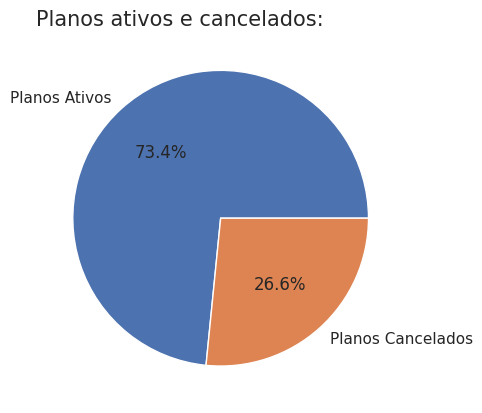

In [576]:
showPorcentagemGrupo(
    'Planos ativos e cancelados:',
    porcentg_planos_ativos,
    porcentg_planos_cancelados,
    ['Planos Ativos','Planos Cancelados'])

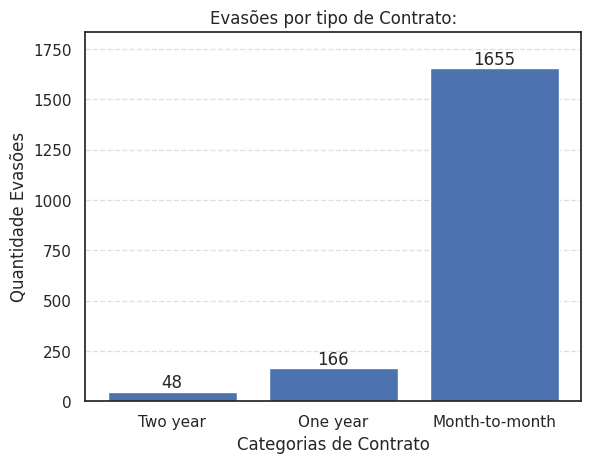

In [577]:
# -------------------------------------------
# Quantidade de evasões por tipo de contrato:
# -------------------------------------------

import matplotlib.pyplot as plt

categorias_grafico = list(df_evasoes.index)
valores = [vl for vl in df_evasoes['churn']]

plt.bar(categorias_grafico, valores)

plt.title('Evasões por tipo de Contrato:')
plt.xlabel('Categorias de Contrato')
plt.ylabel('Quantidade Evasões')
plt.grid(axis='y', linestyle='--', alpha=0.6)

for i, vlr in enumerate(valores):
    plt.text(
        i,
        vlr,
        f'{vlr}',
        ha='center',
        va='bottom')

plt.ylim(0, max(valores) * 1.11)
plt.show()

 ##### **Seguindo roteiro Challenge: Contagem de Evasão por Variáveis Categóricas:**

Agora, vamos explorar como a evasão se distribui de acordo com variáveis categóricas, como gênero, tipo de contrato, método de pagamento, entre outras.

Essa análise pode revelar padrões interessantes, como, por exemplo, se clientes de determinados perfis têm maior tendência a cancelar o serviço, o que ajudará a direcionar ações estratégicas.

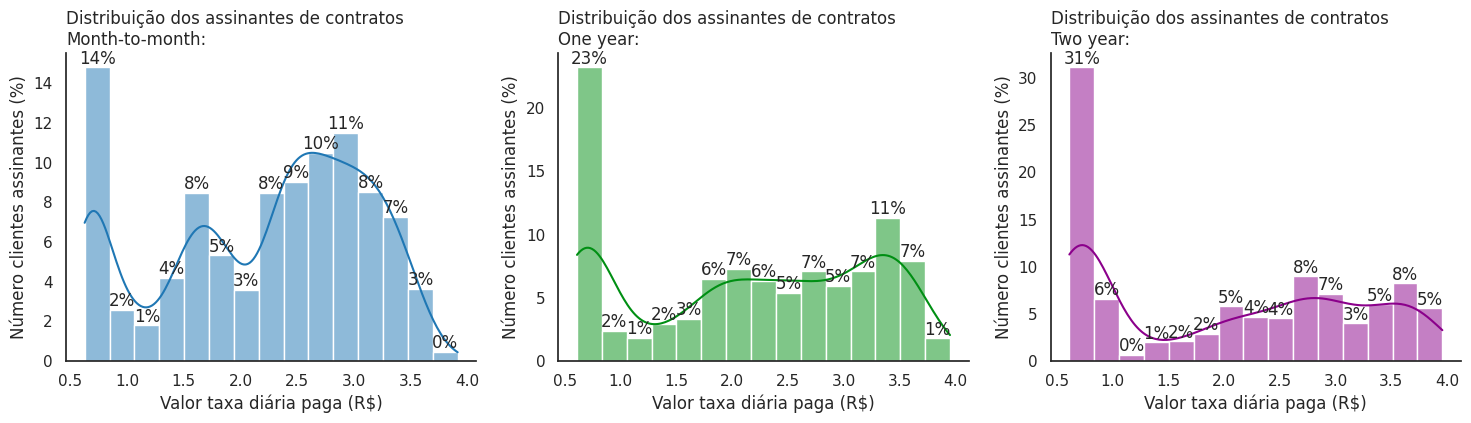

In [578]:
# OBJETIVO GRÁFICO:
# Avaliando a distribuição de taxas
# diárias pagas por clientes
# de diferentes tipos de contrato (Mensal,Anual,Bienal).

import seaborn as sns
import math

def obterDadosContratos(tipoContrato = str):
    clients_pagamento_periodo_x = df['contract'] == tipoContrato
    valores_pagos = df[clients_pagamento_periodo_x]['contas_diarias']
    return valores_pagos

valores_pagos = obterDadosContratos('Month-to-month')
valores_pagos2 = obterDadosContratos('One year')
valores_pagos3 = obterDadosContratos('Two year')

# Construção do Histograma:
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(18,4))
sns.set_theme(style='white')

NUM_CLASSES = 15

def assembleHistogram(
        data,kde,ax,bins,element,stat,color):
    return sns.histplot(
        data=data,
        kde=kde,
        ax=ax,
        bins=bins,
        element=element,
        stat=stat,
        color=color)

hist_plot = assembleHistogram(
    valores_pagos, True, ax1, NUM_CLASSES, 'bars', 'percent', "tab:blue")
hist_plot2 = assembleHistogram(
    valores_pagos2, True, ax2, NUM_CLASSES, 'bars', 'percent', "#008F13")
hist_plot3 = assembleHistogram(
    valores_pagos3, True, ax3, NUM_CLASSES, 'bars', 'percent', "darkmagenta")

def roundLabel(numFloat):
    return math.floor(numFloat)

def addLabelOnBars(histograma, subplot):
    for vls_barras in histograma.containers:
        subplot.bar_label(
            vls_barras,
            labels=[
                f'{roundLabel(vl_individual.get_height())}%'
                for vl_individual in vls_barras ]
            )

addLabelOnBars(hist_plot, ax1)
addLabelOnBars(hist_plot2, ax2)
addLabelOnBars(hist_plot3, ax3)

def assembleSubplotLabel(subplot, tp_contrato):
    str_titulo = 'Distribuição dos assinantes de contratos\n'
    str_titulo += tp_contrato + ':'
    subplot.set_title(str_titulo, loc='left', fontsize=12)

    subplot.set_ylabel('Número clientes assinantes (%)') # Por default, ele pega da Series
    subplot.set_xlabel('Valor taxa diária paga (R$)')

assembleSubplotLabel(ax1,'Month-to-month')
assembleSubplotLabel(ax2,'One year')
assembleSubplotLabel(ax3,'Two year')

sns.despine()

In [579]:
# IDEIA: posso fazer uma releitura do gráfico acima,
# porém separando em classes, os que evadiram apenas, e os que NÃO evadiram
# em outro histograma!

In [580]:
df_info_binarias.query('gender=="Male" & churn==1')[['contas_diarias','charges_monthly','charges_total']]

,contas_diarias,charges_monthly,charges_total
customerID,,,
0004-TLHLJ,2.463333,73.90,280.85
0011-IGKFF,3.266667,98.00,1237.85
0022-TCJCI,2.090000,62.70,2791.50
0023-HGHWL,0.836667,25.10,25.10
0067-DKWBL,1.641667,49.25,91.10
...,...,...,...
9947-OTFQU,2.480000,74.40,1074.30
9948-YPTDG,2.648333,79.45,3013.05
9961-JBNMK,3.226667,96.80,2030.30


In [581]:
homens_evasores = \
df_info_binarias.query('gender=="Male" & churn==1')

homens_evasores[['contas_diarias','charges_monthly','charges_total']].describe()

,contas_diarias,charges_monthly,charges_total
count,930.000000,930.000000,930.000000
mean,2.468900,74.066989,1623.491559
std,0.839178,25.175329,1995.121272
min,0.628333,18.850000,18.850000
25%,1.815000,54.450000,114.737500
50%,2.654167,79.625000,740.150000
75%,3.154583,94.637500,2448.550000
max,3.945000,118.350000,8684.800000


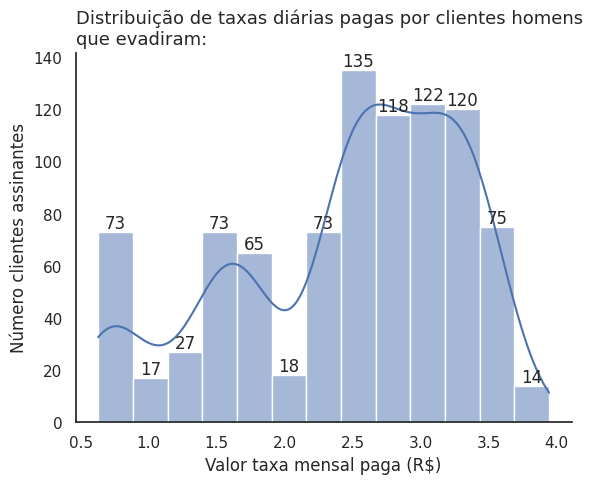

In [582]:
serie_contas_diarias_h_evasores = homens_evasores['contas_diarias']

hist_plot = sns.histplot(
    kde=True,
    data=serie_contas_diarias_h_evasores,
    stat='count',
    #color='darkmagenta'
    )

plt.title('Distribuição de taxas diárias pagas por clientes homens' +
          '\nque evadiram:', loc='left', fontsize=13)
plt.ylabel('Número clientes assinantes')
plt.xlabel('Valor taxa mensal paga (R$)')
sns.despine()

for vl_barra in hist_plot.containers:
    hist_plot.bar_label(vl_barra)

In [583]:
homens_nao_evasores = \
df_info_binarias.query('gender=="Male" & churn==0')

homens_nao_evasores[['contas_diarias','charges_monthly','charges_total']].describe()

,contas_diarias,charges_monthly,charges_total
count,2619.000000,2619.000000,2619.000000
mean,2.031680,60.950401,2517.742402
std,1.031626,30.948793,2306.268502
min,0.608333,18.250000,18.800000
25%,0.833333,25.000000,565.075000
50%,2.146667,64.400000,1654.600000
75%,2.922500,87.675000,4195.850000
max,3.940000,118.200000,8594.400000


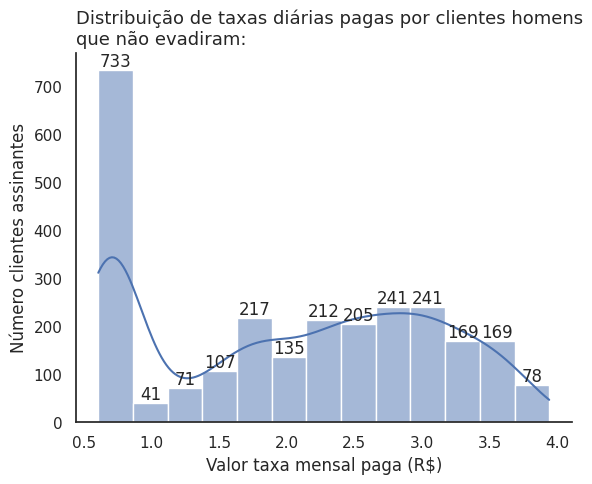

In [584]:
serie_contas_diarias_h_n_evasores = homens_nao_evasores['contas_diarias']

hist_plot = sns.histplot(
    kde=True,
    data=serie_contas_diarias_h_n_evasores,
    stat='count')

plt.title('Distribuição de taxas diárias pagas por clientes homens' +
          '\nque não evadiram:', loc='left', fontsize=13)
plt.ylabel('Número clientes assinantes')
plt.xlabel('Valor taxa mensal paga (R$)')
sns.despine()

for vl_barra in hist_plot.containers:
    hist_plot.bar_label(vl_barra)

In [585]:
mulheres_evasoras = \
df_info_binarias.query('gender=="Female" & churn==1')

mulheres_evasoras[['contas_diarias','charges_monthly','charges_total']].describe()

,contas_diarias,charges_monthly,charges_total
count,939.000000,939.000000,939.000000
mean,2.493736,74.812087,1440.979499
std,0.805293,24.158783,1777.926268
min,0.633333,19.000000,19.100000
25%,2.104167,63.125000,143.750000
50%,2.655000,79.650000,663.050000
75%,3.125000,93.750000,2222.125000
max,3.915000,117.450000,8127.600000


In [586]:
mulheres_n_evasoras = \
df_info_binarias.query('gender=="Female" & churn==0')

mulheres_n_evasoras[['contas_diarias','charges_monthly','charges_total']].describe()

,contas_diarias,charges_monthly,charges_total
count,2544.000000,2544.000000,2544.000000
mean,2.055831,61.674941,2594.054422
std,1.041524,31.245731,2352.916112
min,0.613333,18.400000,18.850000
25%,0.840000,25.200000,599.287500
50%,2.150833,64.525000,1716.650000
75%,2.962083,88.862500,4301.250000
max,3.958333,118.750000,8672.450000


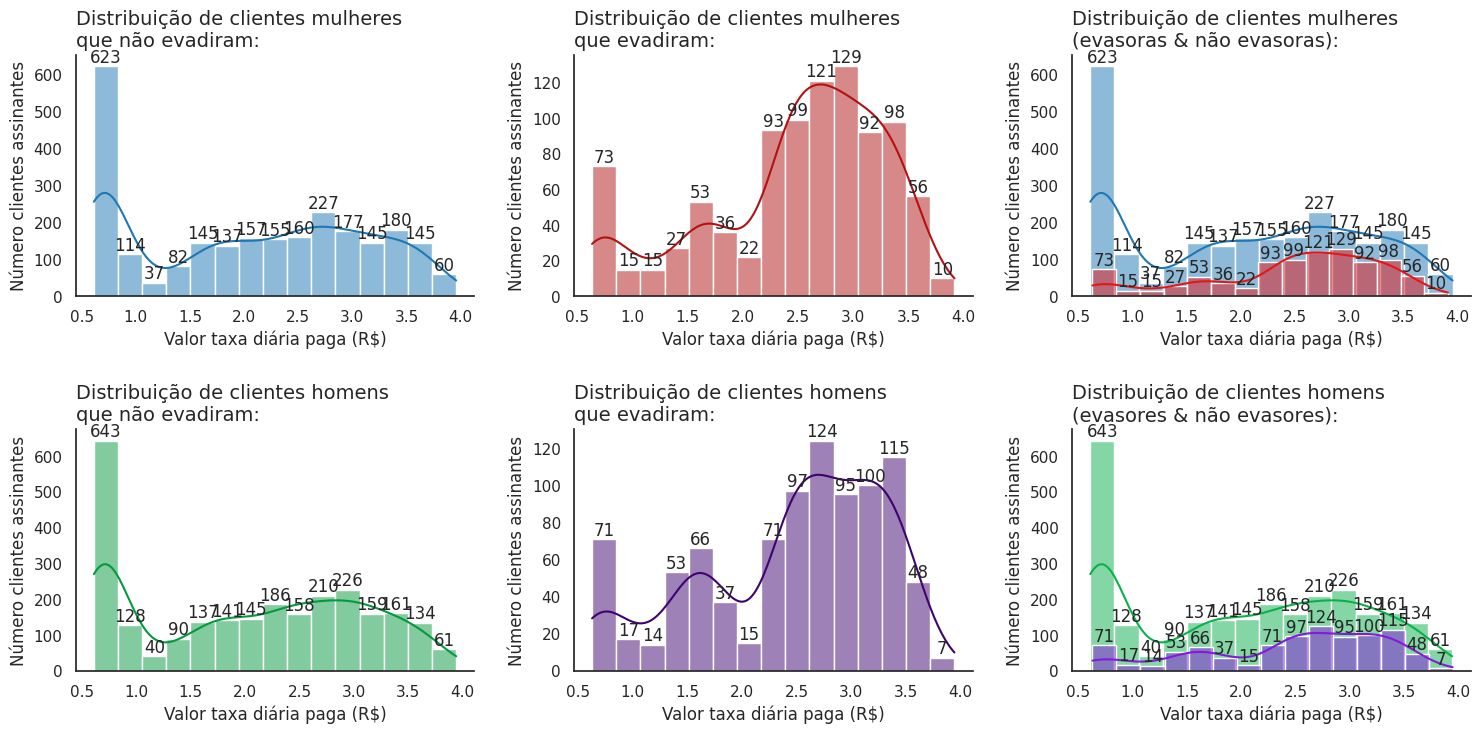

In [587]:
serie_contas_diarias_m_evasoras = mulheres_evasoras['contas_diarias']
serie_contas_diarias_m_n_evasoras = mulheres_n_evasoras['contas_diarias']

fig,axs = plt.subplots(2,3, figsize=(18,8))
fig.subplots_adjust(hspace=0.55,wspace=0.25)
ax1, ax2, ax3 = axs[0]
ax4, ax5, ax6 = axs[1]

NUM_CLASSES = 15

histplot1 = assembleHistogram(
    kde=True,
    data=serie_contas_diarias_m_n_evasoras,
    stat='count',
    color='tab:blue',
    ax=ax1,
    bins=NUM_CLASSES,
    element='bars'
)
histplot2 = assembleHistogram(
    kde=True,
    data=serie_contas_diarias_m_evasoras,
    stat='count',
    color="#B11212",
    ax=ax2,
    bins=NUM_CLASSES,
    element='bars'
)
histplot3a = assembleHistogram(
    kde=True,
    data=serie_contas_diarias_m_n_evasoras,
    stat='count',
    color='tab:blue',
    ax=ax3,
    bins=NUM_CLASSES,
    element='bars'
)
histplot3b = assembleHistogram(
    kde=True,
    data=serie_contas_diarias_m_evasoras,
    stat='count',
    color="#E41616",
    ax=ax3,
    bins=NUM_CLASSES,
    element='bars'
)

histplot4 = assembleHistogram(
    kde=True,
    data=serie_contas_diarias_h_n_evasores,
    stat='count',
    color="#05993E",
    ax=ax4,
    bins=NUM_CLASSES,
    element='bars'
)
histplot5 = assembleHistogram(
    kde=True,
    data=serie_contas_diarias_h_evasores,
    stat='count',
    color="#3E046E",
    ax=ax5,
    bins=NUM_CLASSES,
    element='bars'
)
histplot6a = assembleHistogram(
    kde=True,
    data=serie_contas_diarias_h_n_evasores,
    stat='count',
    color="#0AB14A",
    ax=ax6,
    bins=NUM_CLASSES,
    element='bars'
)
histplot6b = assembleHistogram(
    kde=True,
    data=serie_contas_diarias_h_evasores,
    stat='count',
    color="#8519DD",
    ax=ax6,
    bins=NUM_CLASSES,
    element='bars'
)


def addLabel(nmHistplot):
    for vl_barra in nmHistplot.containers:
        nmHistplot.bar_label(vl_barra)

addLabel(histplot1)
addLabel(histplot2)
addLabel(histplot3a)
addLabel(histplot4)
addLabel(histplot5)
addLabel(histplot6a)

def assembleSubplotLabel2(subplot,
    titulo = str,
    labelEixoY = str,
    labelEixoX = str,
    fSize=int):

    str_titulo = titulo + ':'
    subplot.set_title(str_titulo, loc='left', fontsize=fSize)
    subplot.set_ylabel(labelEixoY)
    subplot.set_xlabel(labelEixoX)

assembleSubplotLabel2(ax1,
    'Distribuição de clientes mulheres \nque não evadiram',
    'Número clientes assinantes',
    'Valor taxa diária paga (R$)', 14)

assembleSubplotLabel2(ax2,
    'Distribuição de clientes mulheres \nque evadiram',
    'Número clientes assinantes',
    'Valor taxa diária paga (R$)', 14)

assembleSubplotLabel2(ax3,
    'Distribuição de clientes mulheres\n(evasoras & não evasoras)',
    'Número clientes assinantes',
    'Valor taxa diária paga (R$)', 14)

assembleSubplotLabel2(ax4,
    'Distribuição de clientes homens \nque não evadiram',
    'Número clientes assinantes',
    'Valor taxa diária paga (R$)', 14)

assembleSubplotLabel2(ax5,
    'Distribuição de clientes homens \nque evadiram',
    'Número clientes assinantes',
    'Valor taxa diária paga (R$)', 14)

assembleSubplotLabel2(ax6,
    'Distribuição de clientes homens\n(evasores & não evasores)',
    'Número clientes assinantes',
    'Valor taxa diária paga (R$)', 14)

sns.despine()

# plt.savefig("images/dist_evasoes_genero.jpg", dpi=300, bbox_inches='tight')

In [588]:
qtd_homens_evasores = len(homens_evasores)
qtd_homens_n_evasores = len(homens_nao_evasores)
qtd_mulheres_evasoras = len(mulheres_evasoras)
qtd_mulheres_n_evasoras = len(mulheres_n_evasoras)

In [589]:
total_homens = qtd_homens_evasores + qtd_homens_n_evasores
porc_evasores = qtd_homens_evasores/total_homens

In [590]:
total_mulheres = qtd_mulheres_evasoras + qtd_mulheres_n_evasoras
porc_evasoras = qtd_mulheres_evasoras/total_mulheres

In [591]:
def roundTxt(valor):
    return f'{round(valor * 100, 2)}%'

In [592]:
print('Homens evasores:',roundTxt(porc_evasores))
print('Homens não evasores:',roundTxt(1 - porc_evasores))
print('Mulheres evasoras:',roundTxt(porc_evasoras))
print('Mulheres não evasoras:',roundTxt(1 - porc_evasoras))

Homens evasores: 26.2%
Homens não evasores: 73.8%
Mulheres evasoras: 26.96%
Mulheres não evasoras: 73.04%


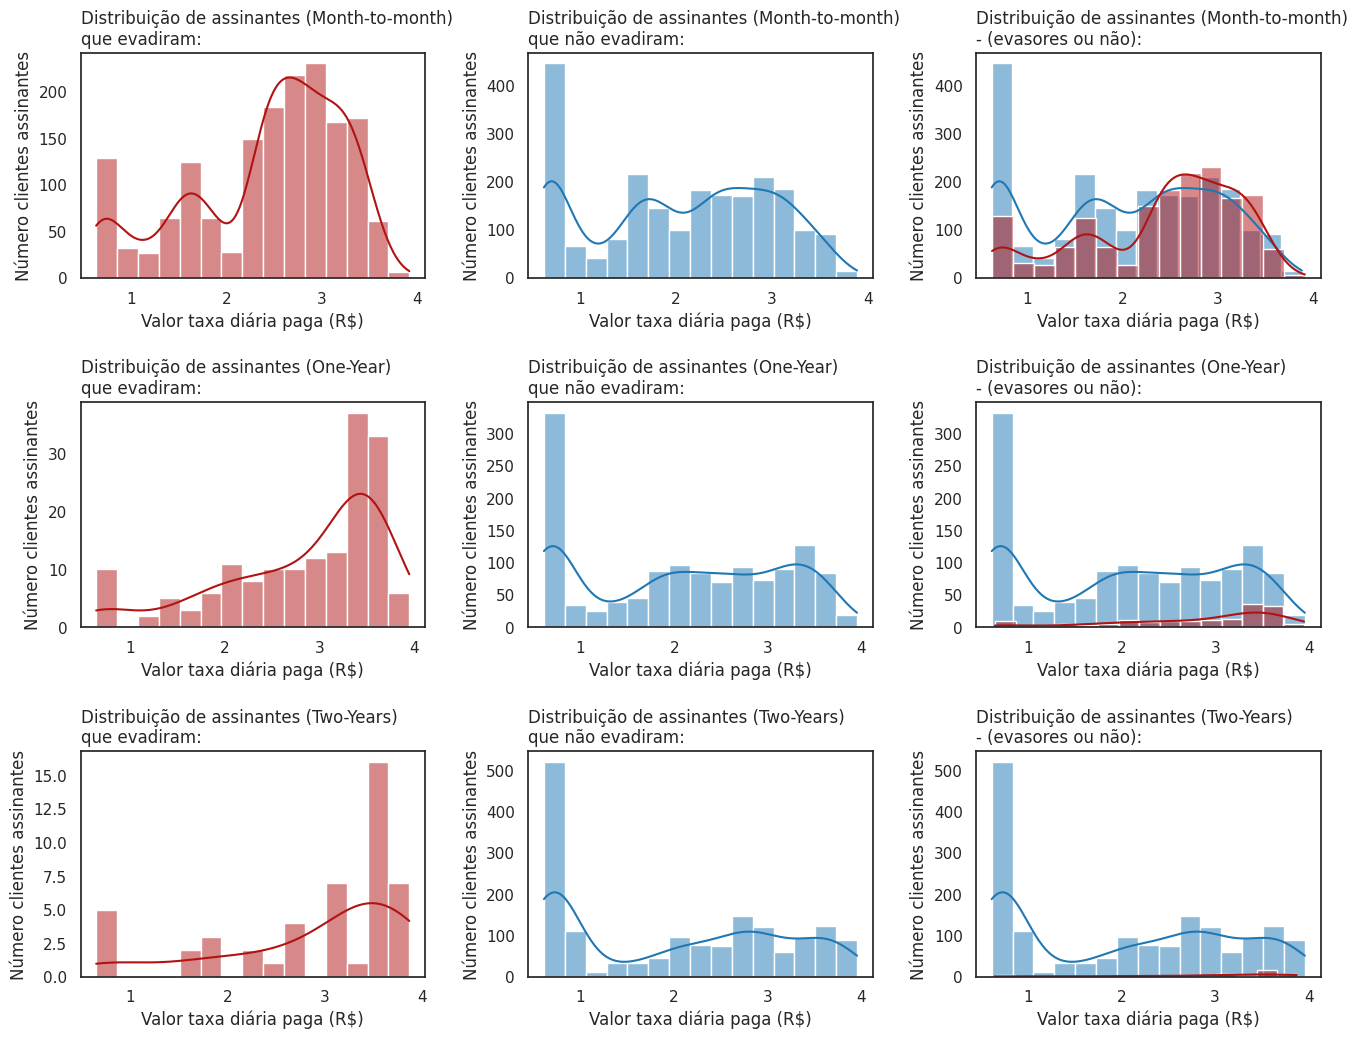

In [593]:
def queryContasDiarias(stringConsulta):
    return df_info_binarias.query(stringConsulta)['contas_diarias']  # ou tbm: ['charges_monthly']

taxas_pagas_evasores_monthToMonth = queryContasDiarias('contract == "Month-to-month" & churn==1')
taxas_pagas_n_evasores_monthToMonth = queryContasDiarias('contract == "Month-to-month" & churn==0')

taxas_pagas_evasores_OneYear = queryContasDiarias('contract == "One year" & churn==1')
taxas_pagas_n_evasores_OneYear = queryContasDiarias('contract == "One year" & churn==0')

taxas_pagas_evasores_TwoYear = queryContasDiarias('contract == "Two year" & churn==1')
taxas_pagas_n_evasores_TwoYear = queryContasDiarias('contract == "Two year" & churn==0')

fig,axs = plt.subplots(3,3, figsize=(16,12), sharey=False)
fig.subplots_adjust(hspace=0.55,wspace=0.3)
ax1, ax2, ax3 = axs[0]
ax4, ax5, ax6 = axs[1]
ax7, ax8, ax9 = axs[2]
NUM_CLASSES = 15

plot1 = assembleHistogram(
    kde=True,
    data=taxas_pagas_evasores_monthToMonth,
    stat='count',
    color='#B11212',
    ax=ax1,
    bins=NUM_CLASSES,
    element='bars'
)

plot2 = assembleHistogram(
    kde=True,
    data=taxas_pagas_n_evasores_monthToMonth,
    stat='count',
    color='tab:blue',
    ax=ax2,
    bins=NUM_CLASSES,
    element='bars'
)

plot3a = assembleHistogram(
    kde=True,
    data=taxas_pagas_n_evasores_monthToMonth,
    stat='count',
    color='tab:blue',
    ax=ax3,
    bins=NUM_CLASSES,
    element='bars'
)

plot3b = assembleHistogram(
    kde=True,
    data=taxas_pagas_evasores_monthToMonth,
    stat='count',
    color='#B11212',
    ax=ax3,
    bins=NUM_CLASSES,
    element='bars'
)

plot4 = assembleHistogram(
    kde=True,
    data=taxas_pagas_evasores_OneYear,
    stat='count',
    color='#B11212',
    ax=ax4,
    bins=NUM_CLASSES,
    element='bars'
)

plot5 = assembleHistogram(
    kde=True,
    data=taxas_pagas_n_evasores_OneYear,
    stat='count',
    color='tab:blue',
    ax=ax5,
    bins=NUM_CLASSES,
    element='bars'
)

plot6a = assembleHistogram(
    kde=True,
    data=taxas_pagas_n_evasores_OneYear,
    stat='count',
    color='tab:blue',
    ax=ax6,
    bins=NUM_CLASSES,
    element='bars'
)

plot6b = assembleHistogram(
    kde=True,
    data=taxas_pagas_evasores_OneYear,
    stat='count',
    color='#B11212',
    ax=ax6,
    bins=NUM_CLASSES,
    element='bars'
)

plot7 = assembleHistogram(
    kde=True,
    data=taxas_pagas_evasores_TwoYear,
    stat='count',
    color='#B11212',
    ax=ax7,
    bins=NUM_CLASSES,
    element='bars'
)

plot8 = assembleHistogram(
    kde=True,
    data=taxas_pagas_n_evasores_TwoYear,
    stat='count',
    color='tab:blue',
    ax=ax8,
    bins=NUM_CLASSES,
    element='bars'
)

plot9a = assembleHistogram(
    kde=True,
    data=taxas_pagas_n_evasores_TwoYear,
    stat='count',
    color='tab:blue',
    ax=ax9,
    bins=NUM_CLASSES,
    element='bars'
)

plot9b = assembleHistogram(
    kde=True,
    data=taxas_pagas_evasores_TwoYear,
    stat='count',
    color='#B11212',
    ax=ax9,
    bins=NUM_CLASSES,
    element='bars'
)

assembleSubplotLabel2(ax1,
    'Distribuição de assinantes (Month-to-month)\nque evadiram',
    'Número clientes assinantes',
    'Valor taxa diária paga (R$)', 12)

assembleSubplotLabel2(ax2,
    'Distribuição de assinantes (Month-to-month)\nque não evadiram',
    'Número clientes assinantes',
    'Valor taxa diária paga (R$)', 12)

assembleSubplotLabel2(ax3,
    'Distribuição de assinantes (Month-to-month)\n- (evasores ou não)',
    'Número clientes assinantes',
    'Valor taxa diária paga (R$)', 12)


assembleSubplotLabel2(ax4,
    'Distribuição de assinantes (One-Year)\nque evadiram',
    'Número clientes assinantes',
    'Valor taxa diária paga (R$)', 12)

assembleSubplotLabel2(ax5,
    'Distribuição de assinantes (One-Year)\nque não evadiram',
    'Número clientes assinantes',
    'Valor taxa diária paga (R$)', 12)

assembleSubplotLabel2(ax6,
    'Distribuição de assinantes (One-Year)\n- (evasores ou não)',
    'Número clientes assinantes',
    'Valor taxa diária paga (R$)', 12)


assembleSubplotLabel2(ax7,
    'Distribuição de assinantes (Two-Years)\nque evadiram',
    'Número clientes assinantes',
    'Valor taxa diária paga (R$)', 12)

assembleSubplotLabel2(ax8,
    'Distribuição de assinantes (Two-Years)\nque não evadiram',
    'Número clientes assinantes',
    'Valor taxa diária paga (R$)', 12)

assembleSubplotLabel2(ax9,
    'Distribuição de assinantes (Two-Years)\n- (evasores ou não)',
    'Número clientes assinantes',
    'Valor taxa diária paga (R$)', 12)


# plt.savefig("images/dist_evasoes_tipo_contrato.jpg", dpi=300, bbox_inches='tight')

In [594]:
# Contabilizar evasões por método de pagamento:

In [595]:
df_info_binarias['paymentmethod'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [596]:
def queryByPaymentOption(statusChurn, metodoPagamento):
    infoBusca = f'churn=={statusChurn} & paymentmethod=="{metodoPagamento}"'
    return df_info_binarias.query(infoBusca)['contas_diarias']

In [597]:
taxas_pagas_checkEmail_evasores = queryByPaymentOption(1,'Mailed check')

In [598]:
taxas_pagas_checkEmail_n_evasores = queryByPaymentOption(0,'Mailed check')

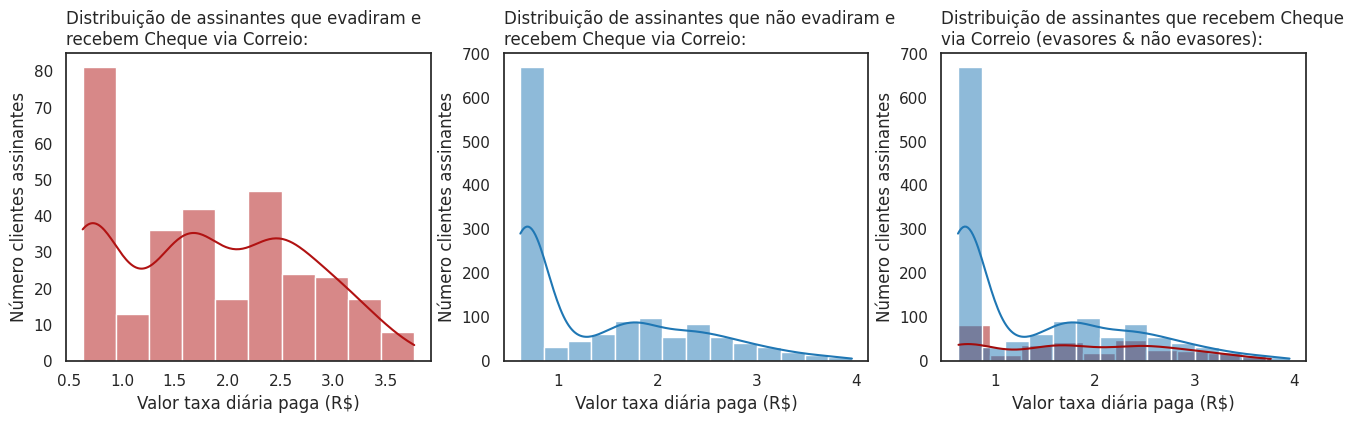

In [599]:
fig,axs = plt.subplots(1,3,figsize=(16,4))
ax1,ax2,ax3 = axs
sns.histplot(
    kde=True,
    data=taxas_pagas_checkEmail_evasores,
    color='#B11212',
    ax=ax1)

sns.histplot(
    kde=True,
    data=taxas_pagas_checkEmail_n_evasores,
    color='tab:blue',
    ax=ax2)

sns.histplot(
    kde=True,
    data=taxas_pagas_checkEmail_evasores,
    color="#A10B0B",
    ax=ax3)

sns.histplot(
    kde=True,
    data=taxas_pagas_checkEmail_n_evasores,
    color='tab:blue',
    ax=ax3)

assembleSubplotLabel2(ax1,
    'Distribuição de assinantes que evadiram e \nrecebem Cheque via Correio',
    'Número clientes assinantes',
    'Valor taxa diária paga (R$)', 12)

assembleSubplotLabel2(ax2,
    'Distribuição de assinantes que não evadiram e \nrecebem Cheque via Correio',
    'Número clientes assinantes',
    'Valor taxa diária paga (R$)', 12)

assembleSubplotLabel2(ax3,
    'Distribuição de assinantes que recebem Cheque\nvia Correio (evasores & não evasores)',
    'Número clientes assinantes',
    'Valor taxa diária paga (R$)', 12)

In [600]:
taxas_pagas_eletroCheck_evasores = queryByPaymentOption(1,'Electronic check')
taxas_pagas_eletroCheck_n_evasores = queryByPaymentOption(0,'Electronic check')

<Axes: xlabel='contas_diarias', ylabel='Count'>

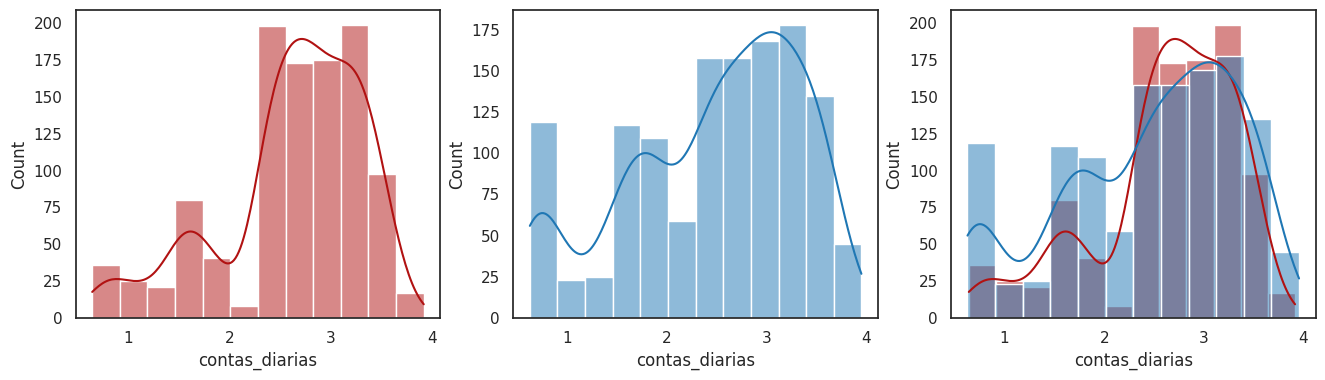

In [601]:
fig,axs = plt.subplots(1,3,figsize=(16,4))
ax1,ax2,ax3 = axs
sns.histplot(
    kde=True,
    data=taxas_pagas_eletroCheck_evasores,
    color='#B11212', ax=ax1, bins=12)
sns.histplot(
    kde=True,
    color='tab:blue', data=taxas_pagas_eletroCheck_n_evasores, ax=ax2, bins=12)

sns.histplot(
    kde=True,
    data=taxas_pagas_eletroCheck_evasores,
    color='#B11212', ax=ax3, bins=12)
sns.histplot(
    kde=True,
    color='tab:blue', data=taxas_pagas_eletroCheck_n_evasores, ax=ax3, bins=12)

In [602]:
x = len(df_info_binarias.query('churn==1 & paymentmethod=="Electronic check"'))
y = len(df_info_binarias.query('churn==0 & paymentmethod=="Electronic check"'))

In [603]:
z = len(df_info_binarias.query('paymentmethod=="Electronic check"'))

In [604]:
z == (x+y)

True

In [605]:
x/z

0.4528541226215645

In [606]:
y/z

0.5471458773784356

In [607]:
taxas_pagas_creditC_evasores = queryByPaymentOption(1,'Credit card (automatic)')
taxas_pagas_creditC_n_evasores = queryByPaymentOption(0,'Credit card (automatic)')

<Axes: xlabel='contas_diarias', ylabel='Count'>

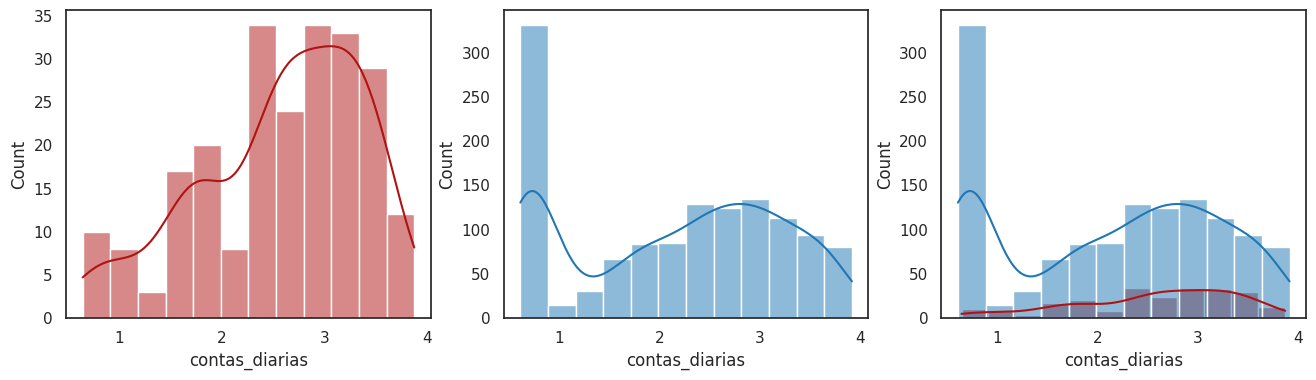

In [608]:
fig,axs = plt.subplots(1,3,figsize=(16,4))
ax1,ax2,ax3 = axs
sns.histplot(
    kde=True,
    data=taxas_pagas_creditC_evasores,
    color='#B11212', ax=ax1, bins=12)
sns.histplot(
    kde=True,
    color='tab:blue', data=taxas_pagas_creditC_n_evasores, ax=ax2, bins=12)

sns.histplot(
    kde=True,
    data=taxas_pagas_creditC_evasores,
    color='#B11212', ax=ax3, bins=12)
sns.histplot(
    kde=True,
    color='tab:blue', data=taxas_pagas_creditC_n_evasores, ax=ax3, bins=12)

In [609]:
taxas_pagas_bankT_evasores = queryByPaymentOption(1,'Bank transfer (automatic)')
taxas_pagas_bankT_n_evasores = queryByPaymentOption(0,'Bank transfer (automatic)')

<Axes: xlabel='contas_diarias', ylabel='Count'>

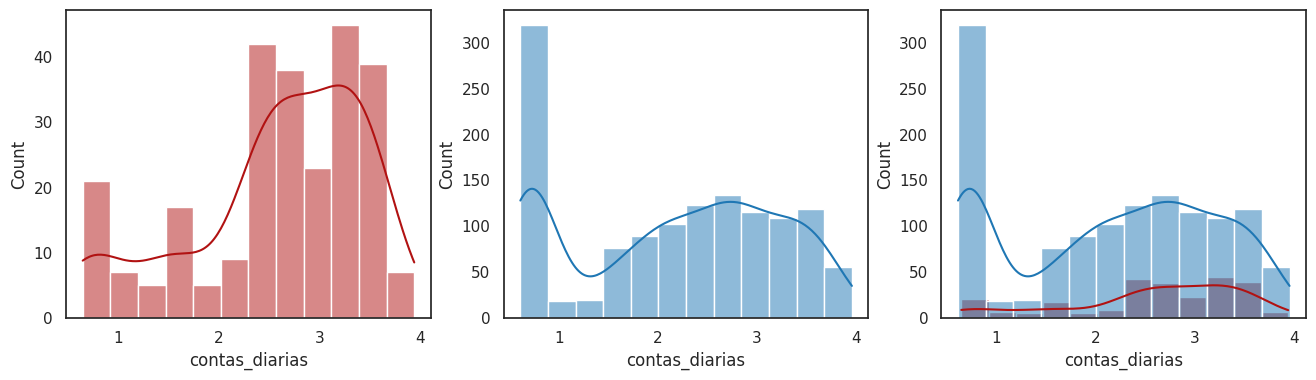

In [610]:
fig,axs = plt.subplots(1,3,figsize=(16,4))
ax1,ax2,ax3 = axs
sns.histplot(
    kde=True,
    data=taxas_pagas_bankT_evasores,
    color='#B11212', ax=ax1, bins=12)
sns.histplot(
    kde=True,
    color='tab:blue', data=taxas_pagas_bankT_n_evasores, ax=ax2, bins=12)

sns.histplot(
    kde=True,
    data=taxas_pagas_bankT_evasores,
    color='#B11212', ax=ax3, bins=12)
sns.histplot(
    kde=True,
    color='tab:blue', data=taxas_pagas_bankT_n_evasores, ax=ax3, bins=12)

##### 💡**Ideia: Vou agrupar Evasões (Churns) por método de pagamento:**

Havia implementado essas evasões de maneira separada, irei fazer em um único
plot para facilitar comparação do leitor.

In [611]:
# =========================================================================
# Automatizando a criação de 3 subplots por linha do gráfico abaixo gerado:
# =========================================================================

def plotConjuntoSubplots(
        taxas_pagas_checkEmail_evasores,
        taxas_pagas_checkEmail_n_evasores,
        ax1, ax2, ax3):

    sns.histplot(
    kde=True,
    data=taxas_pagas_checkEmail_evasores,
    color='#B11212',
    ax=ax1, bins=12)
    sns.histplot(
        kde=True,
        data=taxas_pagas_checkEmail_n_evasores,
        color='tab:blue',
        ax=ax2, bins=12)
    sns.histplot(
        kde=True,
        data=taxas_pagas_checkEmail_evasores,
        color="#A10B0B",
        ax=ax3, bins=12)
    sns.histplot(
        kde=True,
        data=taxas_pagas_checkEmail_n_evasores,
        color='tab:blue',
        ax=ax3, bins=12)

def plotConjuntoLabels(
        legendCol1, legendCol2, legendCol3,
        ax1, ax2, ax3):

    labelEixoY = 'Número clientes assinantes'
    labelEixoX = 'Valor taxa diária paga (R$)'

    assembleSubplotLabel2(ax1,
        legendCol1,
        labelEixoY,
        labelEixoX, 12)
    assembleSubplotLabel2(ax2,
        legendCol2,
        labelEixoY,
        labelEixoX, 12)
    assembleSubplotLabel2(ax3,
        legendCol3,
        labelEixoY,
        labelEixoX, 12)


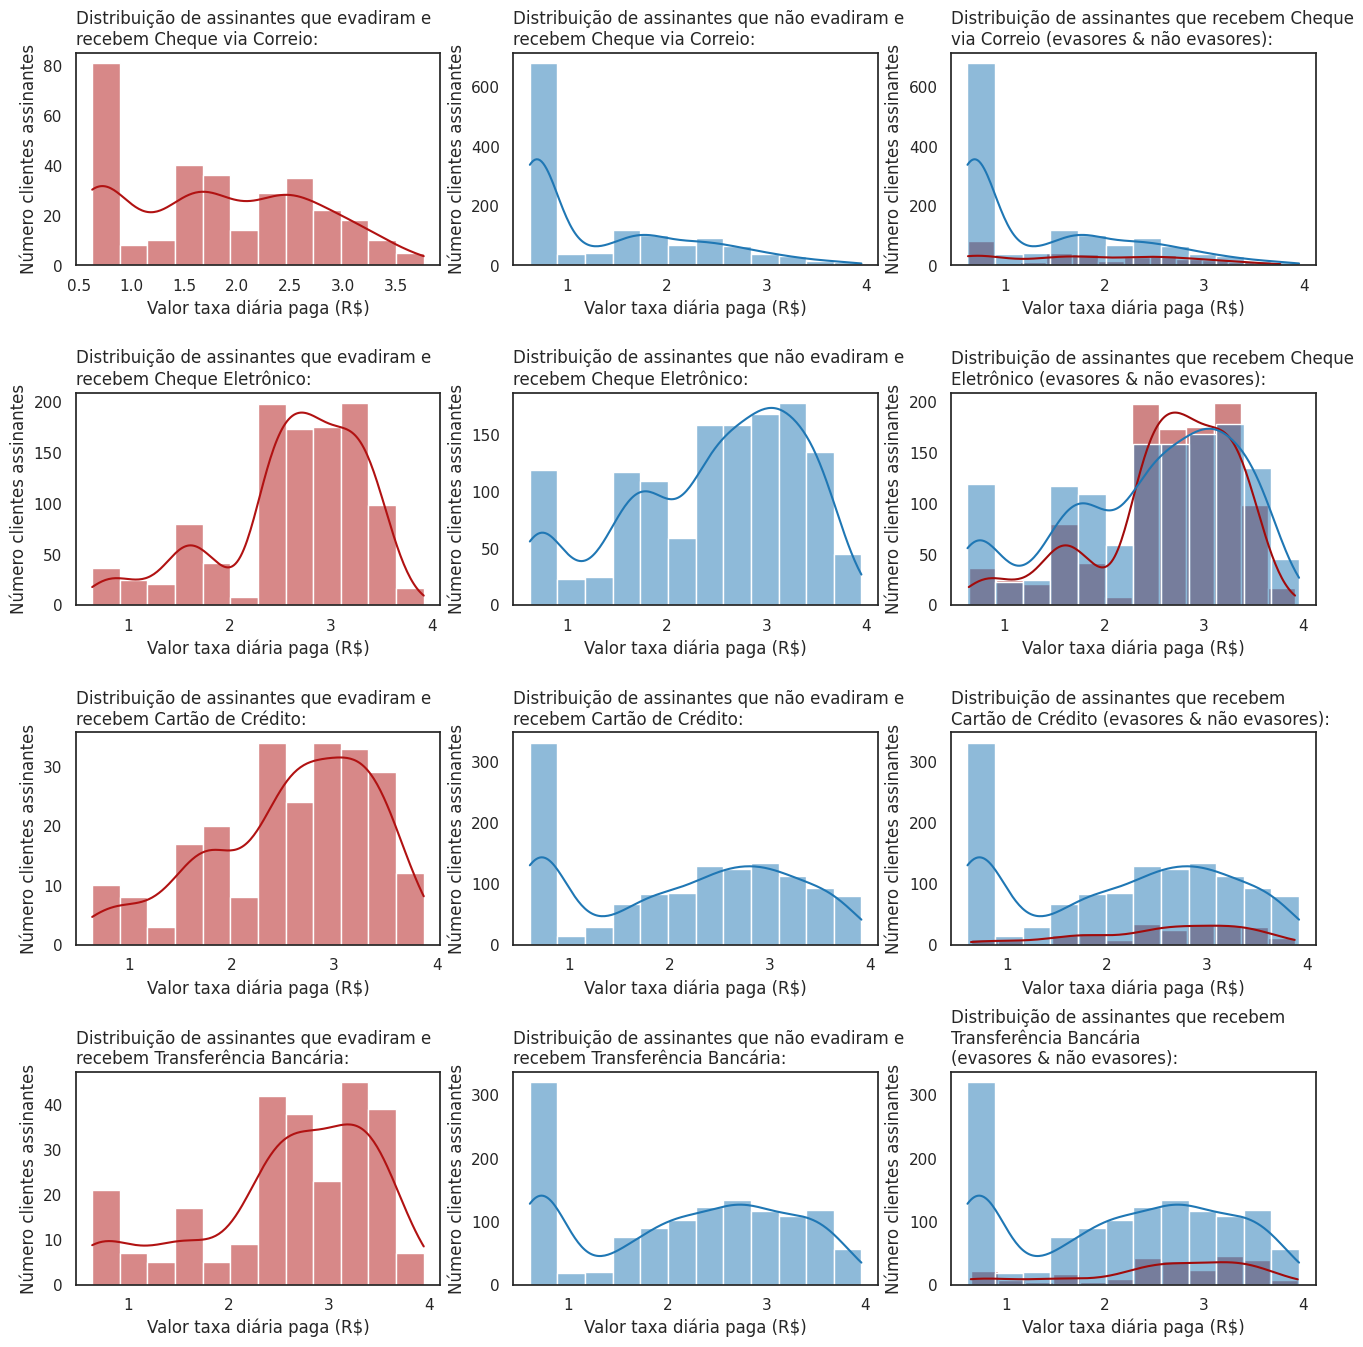

In [612]:
fig,axs = plt.subplots(4,3,figsize=(16,16), sharey=False)
fig.subplots_adjust(hspace=0.6,wspace=0.2)
ax1,ax2,ax3 = axs[0]
ax4,ax5,ax6 = axs[1]
ax7,ax8,ax9 = axs[2]
ax10,ax11,ax12 = axs[3]

plotConjuntoSubplots(
    taxas_pagas_checkEmail_evasores,
    taxas_pagas_checkEmail_n_evasores,
    ax1,ax2,ax3)

plotConjuntoSubplots(
    taxas_pagas_eletroCheck_evasores,
    taxas_pagas_eletroCheck_n_evasores,
    ax4,ax5,ax6)

plotConjuntoSubplots(
    taxas_pagas_creditC_evasores,
    taxas_pagas_creditC_n_evasores,
    ax7,ax8,ax9)

plotConjuntoSubplots(
    taxas_pagas_bankT_evasores,
    taxas_pagas_bankT_n_evasores,
    ax10,ax11,ax12)

plotConjuntoLabels(
    'Distribuição de assinantes que evadiram e \nrecebem Cheque via Correio',
    'Distribuição de assinantes que não evadiram e \nrecebem Cheque via Correio',
    'Distribuição de assinantes que recebem Cheque\nvia Correio (evasores & não evasores)',
    ax1, ax2, ax3
)

plotConjuntoLabels(
    'Distribuição de assinantes que evadiram e \nrecebem Cheque Eletrônico',
    'Distribuição de assinantes que não evadiram e \nrecebem Cheque Eletrônico',
    'Distribuição de assinantes que recebem Cheque\nEletrônico (evasores & não evasores)',
    ax4, ax5, ax6
)

plotConjuntoLabels(
    'Distribuição de assinantes que evadiram e \nrecebem Cartão de Crédito',
    'Distribuição de assinantes que não evadiram e \nrecebem Cartão de Crédito',
    'Distribuição de assinantes que recebem \nCartão de Crédito (evasores & não evasores)',
    ax7, ax8, ax9
)

plotConjuntoLabels(
    'Distribuição de assinantes que evadiram e \nrecebem Transferência Bancária',
    'Distribuição de assinantes que não evadiram e \nrecebem Transferência Bancária',
    'Distribuição de assinantes que recebem \nTransferência Bancária\n(evasores & não evasores)',
    ax10, ax11, ax12
)

# plt.savefig("images/dist_evasoes_tipo_pagamento_shareY.jpg", dpi=300, bbox_inches='tight')

In [613]:
total_gasto_evasores = df_info_binarias.query('churn==1')['charges_total']
total_gasto_n_evasores = df_info_binarias.query('churn==0')['charges_total']
tempo_de_contrato_evasores = df_info_binarias.query('churn==1')['tenure']
tempo_de_contrato_n_evasores = df_info_binarias.query('churn==0')['tenure']

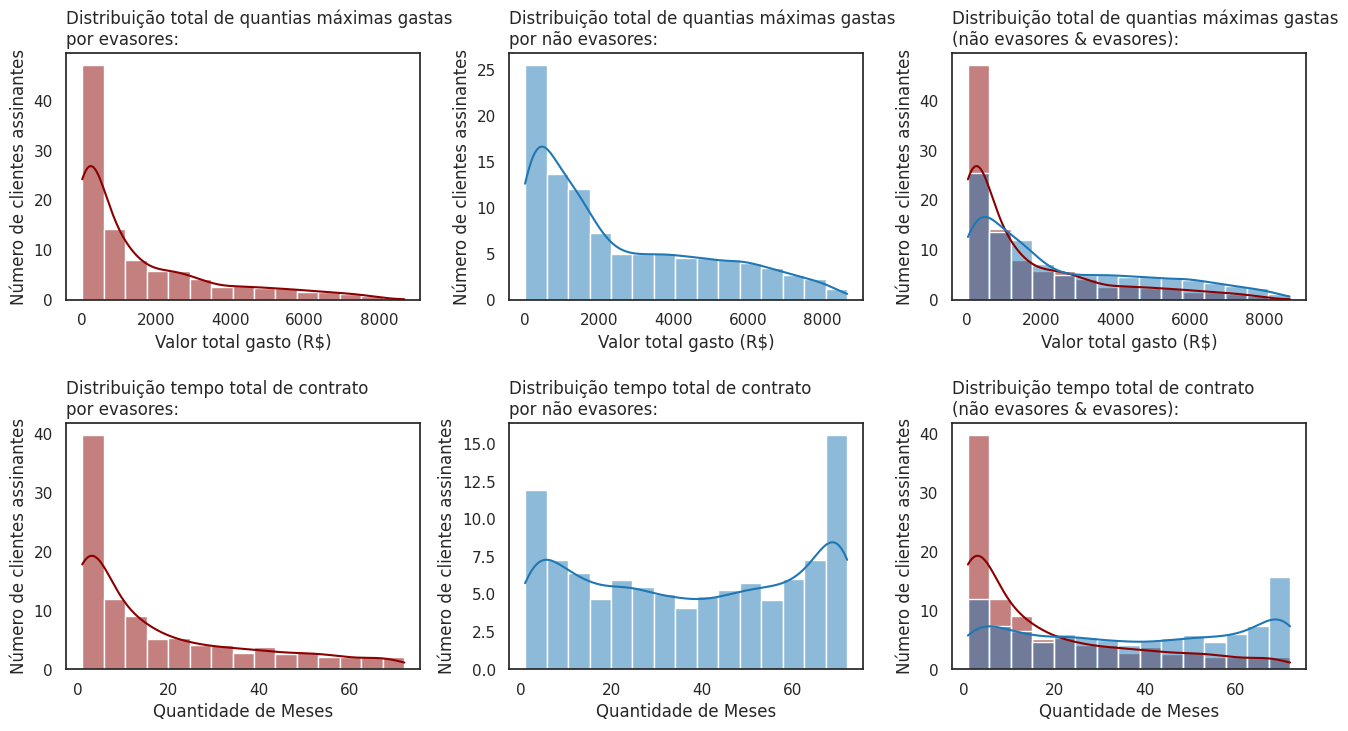

In [614]:
fig, axs = plt.subplots(2,3,figsize=(16,8), sharey=False)
fig.subplots_adjust(hspace=0.5,wspace=0.25)
ax1, ax2, ax3 = axs[0]
ax4, ax5, ax6 = axs[1]
NUM_CLASSES = 15

assembleHistogram(
    total_gasto_evasores, kde=True, ax=ax1,
    element='bars', stat='percent', color="darkred", bins=NUM_CLASSES)

assembleHistogram(
    total_gasto_n_evasores, kde=True, ax=ax2,
    element='bars', stat='percent', color="tab:blue", bins=NUM_CLASSES)

assembleHistogram(
    total_gasto_evasores, kde=True, ax=ax3,
    element='bars', stat='percent', color="darkred", bins=NUM_CLASSES)

assembleHistogram(
    total_gasto_n_evasores, kde=True, ax=ax3,
    element='bars', stat='percent', color="tab:blue", bins=NUM_CLASSES)


assembleHistogram(
    tempo_de_contrato_evasores, kde=True, ax=ax4,
    element='bars', stat='percent', color="darkred", bins=NUM_CLASSES)

assembleHistogram(
    tempo_de_contrato_n_evasores, kde=True, ax=ax5,
    element='bars', stat='percent', color="tab:blue", bins=NUM_CLASSES)

assembleHistogram(
    tempo_de_contrato_evasores, kde=True, ax=ax6,
    element='bars', stat='percent', color="darkred", bins=NUM_CLASSES)

assembleHistogram(
    tempo_de_contrato_n_evasores, kde=True, ax=ax6,
    element='bars', stat='percent', color="tab:blue", bins=NUM_CLASSES)


assembleSubplotLabel2(ax1,
    'Distribuição total de quantias máximas gastas\npor evasores',
    'Número de clientes assinantes',
    'Valor total gasto (R$)',
    12)

assembleSubplotLabel2(ax2,
    'Distribuição total de quantias máximas gastas\npor não evasores',
    'Número de clientes assinantes',
    'Valor total gasto (R$)',
    12)

assembleSubplotLabel2(ax3,
    'Distribuição total de quantias máximas gastas\n(não evasores & evasores)',
    'Número de clientes assinantes',
    'Valor total gasto (R$)',
    12)


assembleSubplotLabel2(ax4,
    'Distribuição tempo total de contrato\npor evasores',
    'Número de clientes assinantes',
    'Quantidade de Meses',
    12)

assembleSubplotLabel2(ax5,
    'Distribuição tempo total de contrato\npor não evasores',
    'Número de clientes assinantes',
    'Quantidade de Meses',
    12)

assembleSubplotLabel2(ax6,
    'Distribuição tempo total de contrato\n(não evasores & evasores)',
    'Número de clientes assinantes',
    'Quantidade de Meses',
    12)

# plt.savefig("images/dist_clientes_por_QuantiaMaxPagas_e_tempoContrato.jpg", dpi=300, bbox_inches='tight')

In [615]:
df_info_binarias.columns

Index(['churn', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'charges_monthly', 'charges_total', 'contas_diarias'],
      dtype='object')

In [616]:
n1 = len(df_info_binarias.query('churn==1 & phoneservice==1'))
n2 = len(df_info_binarias.query('churn==1 & multiplelines==1'))
n3 = len(df_info_binarias.query('churn==1 & internetservice==1'))
n4 = len(df_info_binarias.query('churn==1 & onlinesecurity==1'))
n5 = len(df_info_binarias.query('churn==1 & onlinebackup==1'))
n6 = len(df_info_binarias.query('churn==1 & deviceprotection==1'))
n7 = len(df_info_binarias.query('churn==1 & techsupport==1'))
n8 = len(df_info_binarias.query('churn==1 & streamingtv==1'))
n9 = len(df_info_binarias.query('churn==1 & streamingmovies==1'))

In [617]:
qtd_evasoes = [n1,n2,n3,n4,n5,n6,n7,n8,n9]

In [618]:
legendas = [
    'Phoneservice', 'Multiplelines', 'Internetservice', 'Onlinesecurity',
    'Onlinebackup', 'Deviceprotection', 'Techsupport', 'Streamingtv',
    'Streamingmovies'
]

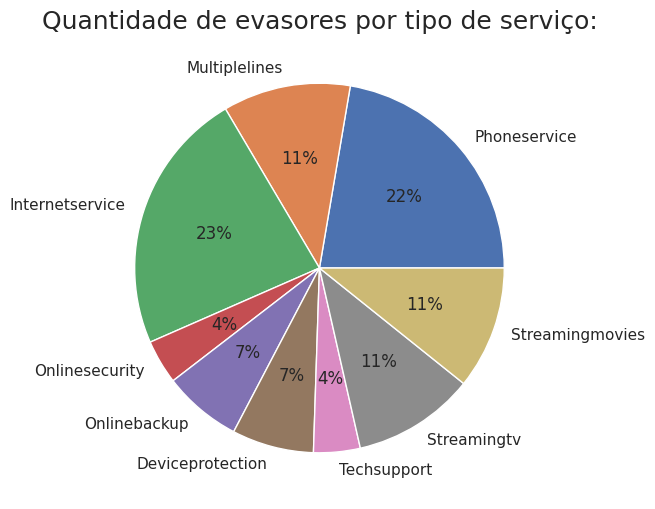

In [619]:
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(qtd_evasoes, labels=legendas, autopct='%1.0f%%')
ax.set_title('Quantidade de evasores por tipo de serviço:', fontsize=18)
plt.show()

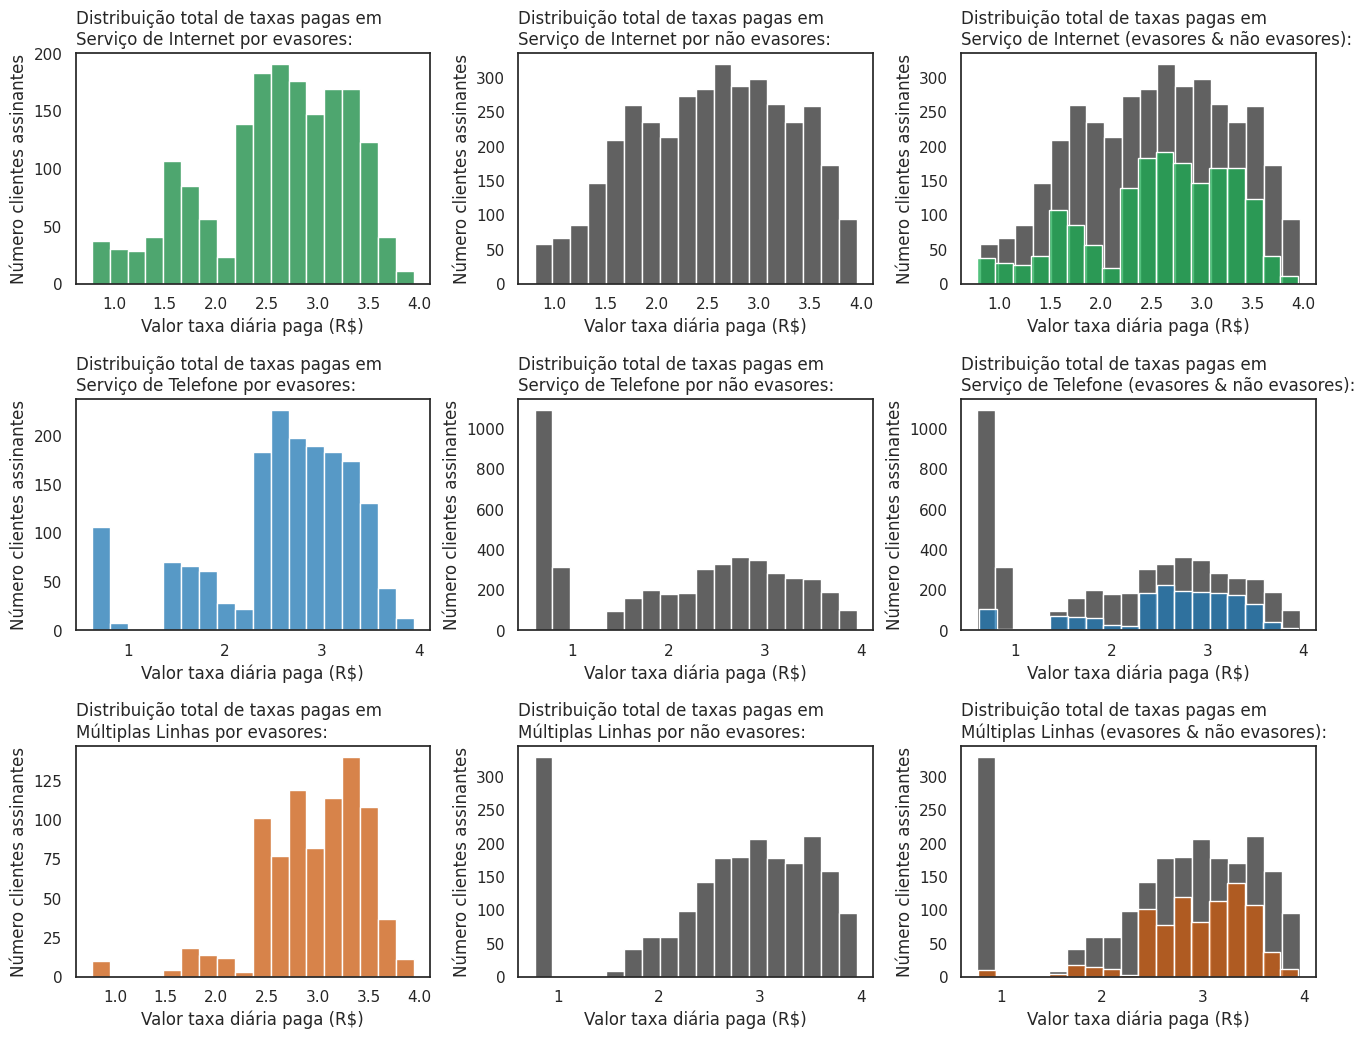

In [620]:
a1 = df_info_binarias.query('churn==1 & internetservice==1')['contas_diarias']
a2 = df_info_binarias.query('churn==0 & internetservice==1')['contas_diarias']

b1 = df_info_binarias.query('churn==1 & phoneservice==1')['contas_diarias']
b2 = df_info_binarias.query('churn==0 & phoneservice==1')['contas_diarias']

c1 = df_info_binarias.query('churn==1 & multiplelines==1')['contas_diarias']
c2 = df_info_binarias.query('churn==0 & multiplelines==1')['contas_diarias']

fig, axs = plt.subplots(3,3, figsize=(16,12))
fig.subplots_adjust(hspace=0.5,wspace=0.25)
ax1, ax2, axy1 = axs[0]
ax3, ax4, axy2 = axs[1]
ax5, ax6, axy3 = axs[2]
NUM_CLASSES = 18

sns.histplot(data=a1, ax=ax1, bins=NUM_CLASSES, color="#12883F")
sns.histplot(data=a2, ax=ax2, bins=NUM_CLASSES, color="#2C2C2C")
sns.histplot(data=a2, ax=axy1, bins=NUM_CLASSES, color="#2C2C2C")
sns.histplot(data=a1, ax=axy1, bins=NUM_CLASSES, color="#19AC51")

sns.histplot(data=b1, ax=ax3, bins=NUM_CLASSES, color="tab:blue")
sns.histplot(data=b2, ax=ax4, bins=NUM_CLASSES, color="#2C2C2C")
sns.histplot(data=b2, ax=axy2, bins=NUM_CLASSES, color="#2C2C2C")
sns.histplot(data=b1, ax=axy2, bins=NUM_CLASSES, color="tab:blue")

sns.histplot(data=c1, ax=ax5, bins=NUM_CLASSES, color="#CA590D")
sns.histplot(data=c2, ax=ax6, bins=NUM_CLASSES, color="#2C2C2C")
sns.histplot(data=c2, ax=axy3, bins=NUM_CLASSES, color="#2C2C2C")
sns.histplot(data=c1, ax=axy3, bins=NUM_CLASSES, color="#CA590D")


plotConjuntoLabels(
    'Distribuição total de taxas pagas em \nServiço de Internet por evasores',
    'Distribuição total de taxas pagas em \nServiço de Internet por não evasores',
    'Distribuição total de taxas pagas em \nServiço de Internet (evasores & não evasores)',
    ax1, ax2, axy1
)

plotConjuntoLabels(
    'Distribuição total de taxas pagas em \nServiço de Telefone por evasores',
    'Distribuição total de taxas pagas em \nServiço de Telefone por não evasores',
    'Distribuição total de taxas pagas em \nServiço de Telefone (evasores & não evasores)',
    ax3, ax4, axy2
)

plotConjuntoLabels(
    'Distribuição total de taxas pagas em \nMúltiplas Linhas por evasores',
    'Distribuição total de taxas pagas em \nMúltiplas Linhas por não evasores',
    'Distribuição total de taxas pagas em \nMúltiplas Linhas (evasores & não evasores)',
    ax5, ax6, axy3
)

# plt.savefig('images/distTaxasPagasServMaisEvadidos.jpg', dpi=300, bbox_inches='tight')

### 📜 **Relatório Final:**
------

#### **1. Introdução:**

- **Problema osbservado:** Ao analisar o dataset, é informado que há um grau alto de evasão nos clientes da **Telecom X**.
- **Objetivo da Análise:**
No Challenge em questão, foi passada a mim a tarefa de descobrir padrões relacionados a evasão de clientes na empresa **Telecom X**; e com base em tais descobertas, a equipe de Data Science poderá então produzir modelos para melhor retenção de usuários.

#### **2. Limpeza e Tratamento de Dados:**

Nas primeiras etapas do Challenge, foi priorizado obter conhecimento de como o dataset disponibilizado pela Alura/Oracle funciona. Foram realizados os seguintes passos:

- 1) *Extração dos dados via API:*
    - Foi baixado o arquivo.json contendo os dados a respeito do Challenge. O arquivo em si tem o nome **TelecomX_Data.json**.
    - Em seguida, o mesmo foi armazenado em uma pasta específica do repositóro por mim criado. Portanto, o arquivo está disponível atualmente em: **data/dadosAPI/TelecomX_Data.json**.
- 2) *Limpeza e Tratamento de Dados:*
    - Depois de extraído, os componentes do dataset foram estudados por mim, para melhor compreensão das informações presentes no mesmo. Avaliei a necessidade delas serem normalizadas, apagadas, se haviam informações vazias, dados inadequados etc.
    - Entre os principais passos do tratamento de informações, houve a normalização de colunas compactadas por meio do método **pd.json_normalize()**. Usado para desaglutinar dados e os inserir na forma de informações descompactadas em um dataset reajustado, organizando tais informações descompactadas pelo ID de cada usuário.
    - Em seguida, foi-se utilizado o método **dataframe.unique()** e outros para observar tipos de informações preenchidas por coluna. Feito isso, informações vazias ou inadequadas foram removidas do dataset. Logo depois, foi feita uma cópia dele, a qual qualquer informação string do tipo **"Yes"/"No"** foi substituída por **1** e **0** para facilitar manipulações futuras.

#### **3. Análise Exploratória de Dados:**

Certos padrões foram notados entre os usuários evasores da empresa, segue abaixo a apresentação e contextualização do mesmos. A primeira observação feita, foi com relação à porcentagem de evasão. Viu-se que aproximadamente 1/4 dos clientes (*26.6%*) evadiram:

##### **Figura 1: Planos ativos e cancelados:**

![porcentagem_evasores](https://raw.githubusercontent.com/Megalonnix/ChallengeTelecomX/refs/heads/master/images/imagens_relatorio/img1.png)

Foi então analisado quais grupos estavam entre os maiores evasores, com base no **tipo de contrato do cliente** foi descoberto o seguinte: a maior parte das evasões vem de contratos baseados em **cobrança mensal**.

##### **Figura 2: Evasões por tipo de contrato:**

![contratos_evasores](https://raw.githubusercontent.com/Megalonnix/ChallengeTelecomX/refs/heads/master/images/imagens_relatorio/img2.png)

Com base na descoberta acima, fui instigado a fazer análises com relação a distribuição de valores, pagos por clientes que possuiam certo tipo de contrato. De fato, nota-se pelo *gráfico abaixo*, que clientes com contrato **Month-to-month** tendem a pagar taxas diárias mais altas que clientes de outros tipos:

> ⚠️ **Aviso:** Dada a *figura 3* ser muito grande, recomenda-se clicar com o botão direito na mesma, e depois
escolher "Abrir imagem num novo separador".

##### **Figura 3: Distribuição de valores pagos por assinantes de determinados tipos de contrato:**

![dist_contratos_evasores](https://raw.githubusercontent.com/Megalonnix/ChallengeTelecomX/refs/heads/master/images/imagens_relatorio/img3.png)

Observou-se também (baseado na *figura 4*) que a **diferença entre evasores e não evasores**, presentes nos três grupos acima é *elevada*. A *figura 4* mostra como *todos os grupos evasores tendem a pagar maiores valores*, e **como usuários Month-to-month tendem a serem os que mais evadem**:

##### **Figura 4: Distribuição de valores pagos por assinantes de determinados tipos de contrato (Evasores & Não Evasores):**

![porcentagem_evasores2](https://raw.githubusercontent.com/Megalonnix/ChallengeTelecomX/refs/heads/master/images/imagens_relatorio/img5.png)

Além de discrepâncias com base no tipo de contrato, busquei outras possíveis relações, tal como diferenças entre gênero dos usuários, método de pagamento, entre outras.

Abaixo seguem as análises com maior discrepância no número de evasores e não evasores. A *categoria de pagamentos por Cheque Eletrônico é a que mais apresenta evasões*. A *figura 5* mostra tal situação.

##### **Figura 5: Distribuição de valores pagos por assinantes por Método de Pagamento (Evasores & Não Evasores):**

![porcentagem_evasores3](https://raw.githubusercontent.com/Megalonnix/ChallengeTelecomX/refs/heads/master/images/imagens_relatorio/img6.png)

Outro fator relevante visto foi a taxa de retenção de clientes por tempo de contrato em meses.

##### **Figura 6: Distribuição na duração em de meses de contrato por assinantes (Evasores & Não Evasores):**

![qtd_evasores4](https://raw.githubusercontent.com/Megalonnix/ChallengeTelecomX/refs/heads/master/images/imagens_relatorio/img7b.png)

Observa-se, com base na *figura 6* acima, que a maior parte dos evasores são pessoas com poucos meses de contrato.

Após tais observações terem cido feitas, outra dúvita veio em mente. **Quais são os serviços mais usados por evasores?**

Com base na *figura 7* abaixo, conclui-se que os *serviços mais utilizados por clientes evasores* são:

- **1º Lugar:** Serviço de Internet;
- **2º Lugar:** Serviço de Telefone;
- **3º Lugar:** Múltiplas Linhas Telefônicas;

##### **Figura 7: Quantidade (%) de evasores por tipo de serviço:**

![qtd_evasores4](https://raw.githubusercontent.com/Megalonnix/ChallengeTelecomX/refs/heads/master/images/imagens_relatorio/img8.png)

Complementando o gráfico da *figura 7*, o gráfico da *figura 8* evidencia como clientes, usuários dos **três serviços mais usados por evasores**, tendem a pagar taxas diárias por uso de serviço **mais altas**.

##### **Figura 8: Distribuição de taxas diárias pagas pelos 3 serviços mais usados por Evasores (Comparando também com Não Evasores):**

![dist_evasores5](https://raw.githubusercontent.com/Megalonnix/ChallengeTelecomX/refs/heads/master/images/imagens_relatorio/img9.png)

#### 📋**Conclusões e Insights:**

Com base nas análises mostradas acima, podemos observar os principais padrões ligados a evasão:
- **1º:** Contratos baseados em pagamento mensal;
- **2º:** Evasores tendem a pagar maiores taxas diárias;
- **3º:** A maior parte dos evasores tendem a usar como método de pagamento Cheque Eletrônico;
- **4º:** A maioria dos evasores não permaneceram muitos meses;
- **5º:** A maioria dos evasores usa em grande parte serviços para uso de Internet e Telefone, considerando até múltiplas linhas telefônicas.

É possível que as altas taxas pagas por evasores, estejam justamente ligadas ao uso de serviços de telefonia e internet dos mesmos.

#### **Recomendações:**

Com base nos padrões captados, talvez a empresa **Telecom X** pudesse oferecer bônus cumulativos por quantidade de linhas telefonicas abertas. Além de estimular pacotes de internet e telefonia com bônus, baseados em uma maior quantidade de meses de assinatura. Quanto maior o tempo de assinatura do cliente, mais descontos ou benefícios o mesmo ganharia da empresa.